# **Breast Cancer Wisconsin Diagnostic**

[Kaggle's link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv)

Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_rows", None)
pd.pandas.set_option("display.max_columns", None)

# **Load Dataset**


Load the dataset from .csv file

In [ ]:
df = pd.read_csv("/content/data.csv")

# **Data Understanding**


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Shape of data

In [ ]:
df.shape # 569 instances and 33 dimensions (rows x columns)

(569, 33)

# **Data Analysis**


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Types of columns

In [ ]:
df.dtypes # All floats except 'id' and 'diagnosis'

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Check if there is any null value

In [ ]:
df.isnull().values.any()

True

Count how many null values there are for each column

In [ ]:
df.isnull().sum() # All values of Unnamed are null

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We can remove the 'id' and 'Unnamed' column because they are useless

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().values.any()

False

# **Data visualization**


Let's see how the cells are distributed in cancer and not

In [ ]:
df["diagnosis"].value_counts(normalize = True) * 100 

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

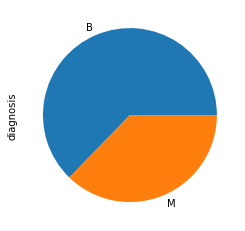

In [ ]:
df["diagnosis"].value_counts().plot.pie();

Encoding diagnosis from categorical to int

In [ ]:
df['diagnosis']= df['diagnosis'].replace('M', 1) # M to 1
df['diagnosis']= df['diagnosis'].replace('B', 0) # B to 0

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Hist for each column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


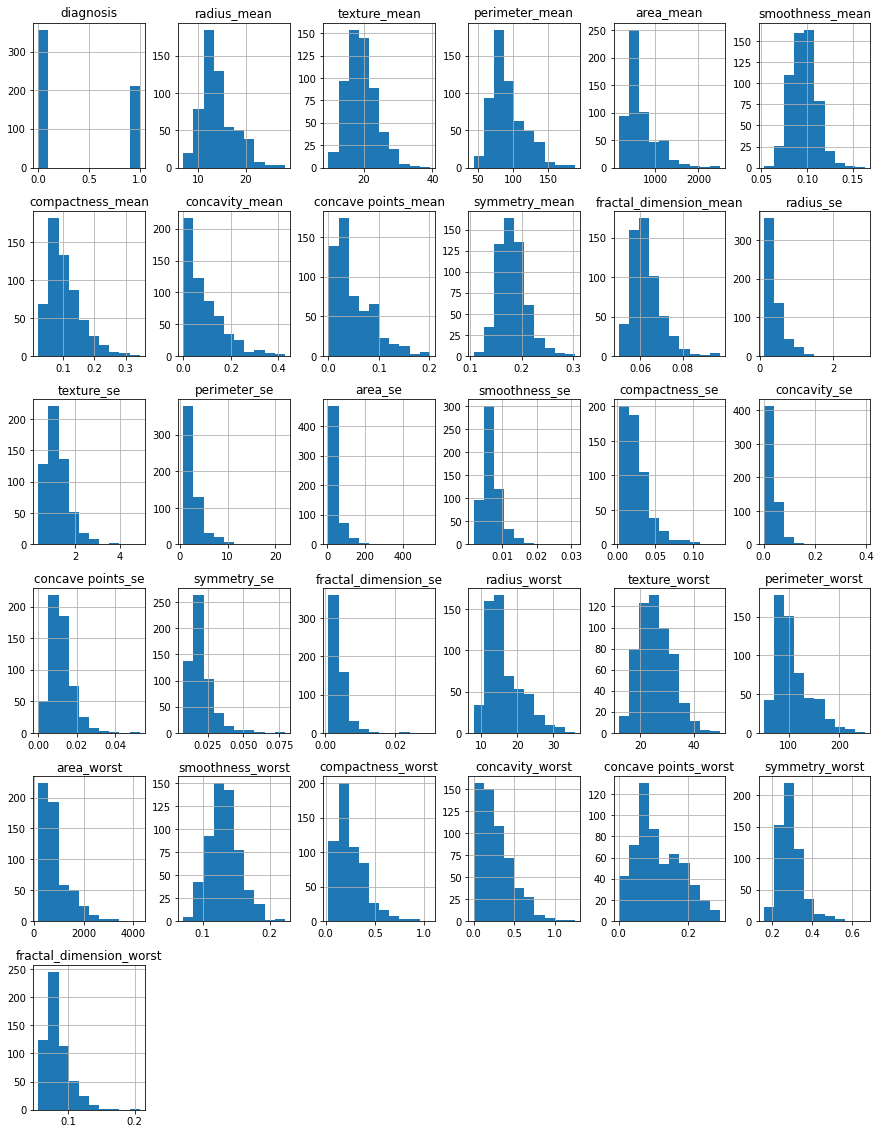

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

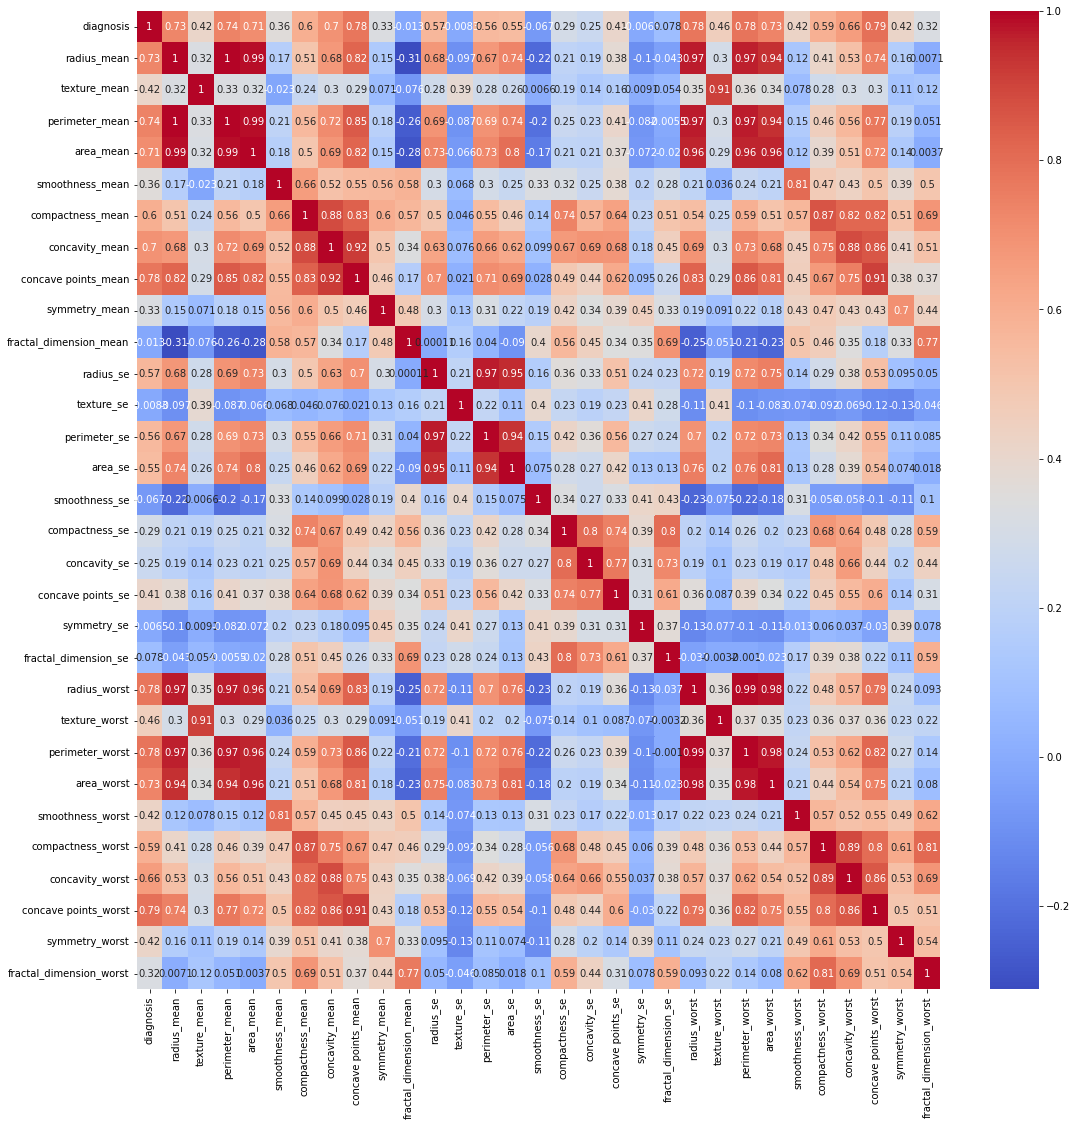

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

Let's see the most positive correlated features with 'diagnosis' (> 0.5)

In [ ]:
most_correlated_feature = [index for index in corr[abs(corr['diagnosis']) > 0.5].index if index != 'diagnosis']
df.corr()['diagnosis'][most_correlated_feature].sort_values(ascending=False)

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64

Let's see now the most negative correlated features with 'diagnosis' (< 0.5)

In [ ]:
negative_correlated_feature = corr[abs(corr['diagnosis']) < 0.5].index
df.corr()['diagnosis'][negative_correlated_feature].sort_values(ascending=False)

texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

# **Preprocessing**


Selecting 20 most correlated features

In [ ]:
df_ = df[df.corr()['diagnosis'][corr[abs(corr['diagnosis']) > 0].index].sort_values(ascending=False)[:20].index]
df_.head()

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst,symmetry_worst,texture_mean
0,1,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,17.33,0.1622,0.4601,10.38
1,1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,23.41,0.1238,0.2750,17.77
2,1,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,25.53,0.1444,0.3613,21.25
3,1,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,26.50,0.2098,0.6638,20.38
4,1,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,16.67,0.1374,0.2364,14.34


In [ ]:
df_.shape # New shape

(569, 20)

In [ ]:
len(df_.columns)

20

Observe data distribution

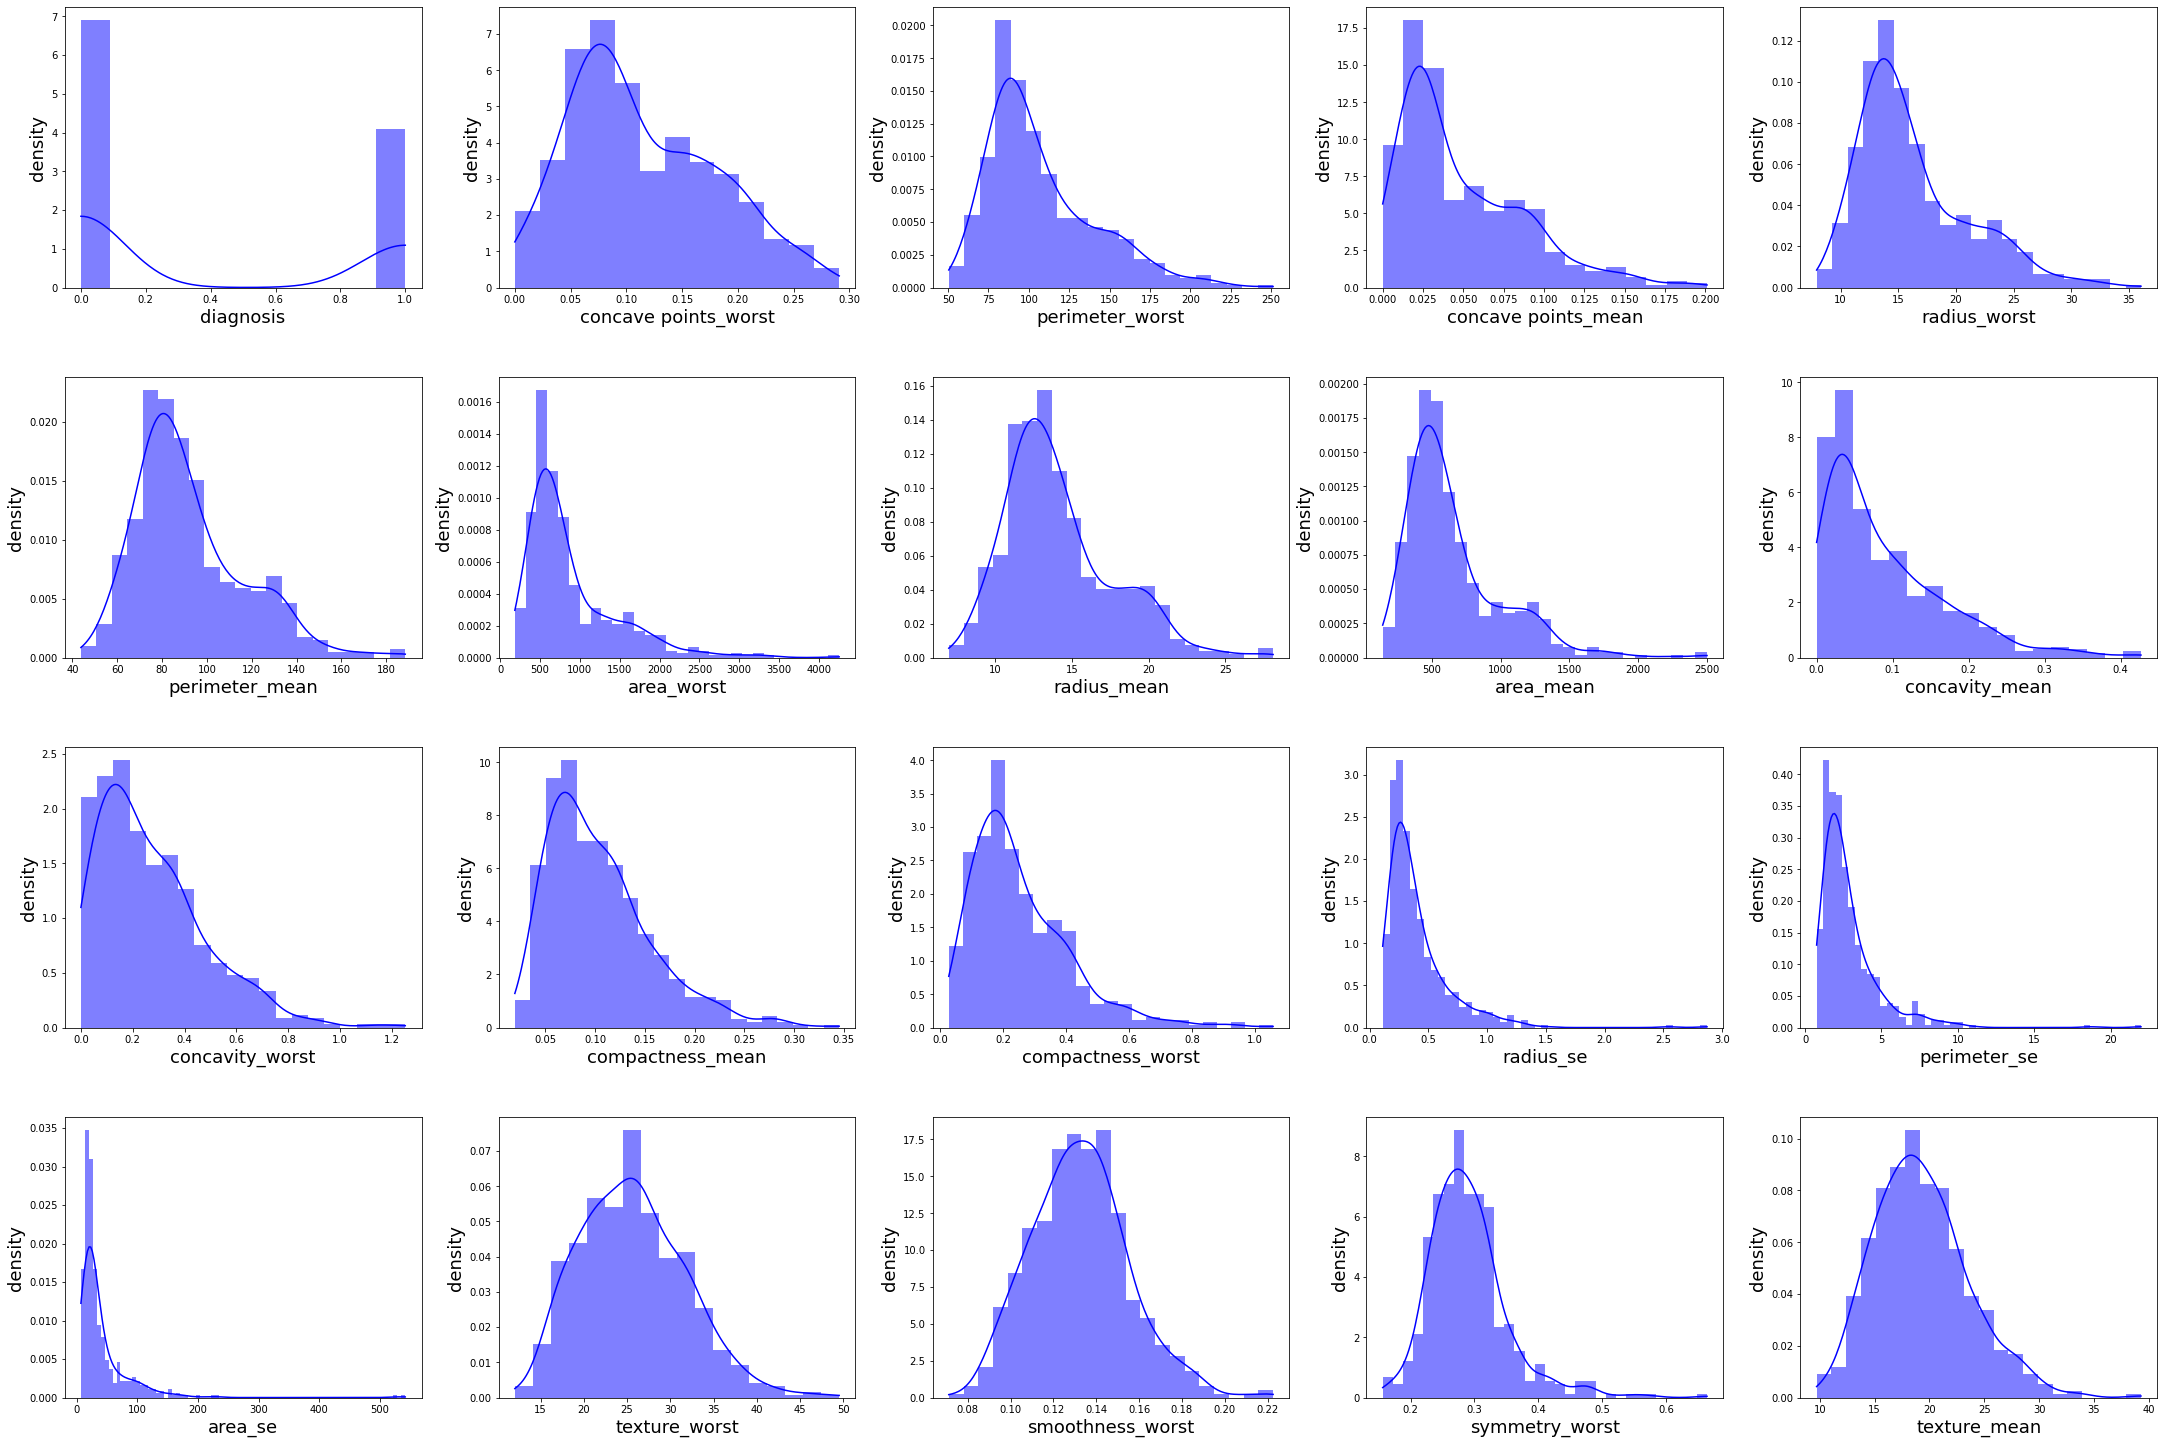

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,20))
index = 0
ax = ax.flatten()

for col, value in df_.items():
    col_dist = sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# **Splitting data**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

Splitting data into x and y

In [ ]:
x = df_.drop('diagnosis', axis = 1)
y = df_["diagnosis"]

In [ ]:
x.shape, y.shape

((569, 19), (569,))

Training set: 80% of data
Test set: 20% of data

In [ ]:
# 'stratify' is used to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y) 

Shape of training's data

In [ ]:
x_train.shape, y_train.shape

((455, 19), (455,))

Shape of validation's data

In [ ]:
x_validation.shape, y_validation.shape

((114, 19), (114,))

Proportion of 'diagnosis' in training and validation

In [ ]:
y_train.value_counts(normalize = True) * 100

0    62.637363
1    37.362637
Name: diagnosis, dtype: float64

In [ ]:
y_validation.value_counts(normalize = True) * 100

0    63.157895
1    36.842105
Name: diagnosis, dtype: float64

# **Machine Learning Models**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# *Perceptron*


In [ ]:
from sklearn.linear_model import Perceptron

* Use a Pipeline to increase the readability of the model and write more compact code
* Use a StandardScaler to standardize the data, this should increase accuracy
* Initially use a simple Perceptron to see how accuracy is going





In [ ]:
model_perceptron = Pipeline([
    ("scaler", StandardScaler()),
    ("perceptron", Perceptron(random_state = 42)) 
])

In [ ]:
model_perceptron.fit(x_train, y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('perceptron', Perceptron(random_state=42))])

Weights that the model has attributed to the features

In [ ]:
pd.Series(index=x.columns, data=model_perceptron.named_steps["perceptron"].coef_.ravel()).sort_values(ascending=False)

radius_se               7.653684
concave points_mean     7.611327
texture_worst           6.433595
concave points_worst    5.841194
area_se                 5.834391
radius_worst            5.238728
area_worst              4.592117
concavity_worst         4.072957
perimeter_worst         3.737693
smoothness_worst        3.347801
symmetry_worst          2.529176
perimeter_se            2.527773
radius_mean            -0.672743
perimeter_mean         -0.692660
area_mean              -1.198693
texture_mean           -1.720834
concavity_mean         -3.731716
compactness_worst      -4.116514
compactness_mean       -8.919427
dtype: float64

With a simple perceptron the accuracy on validation set is about 93%

In [ ]:
model_perceptron.score(x_validation, y_validation)

0.9298245614035088

Predictions on validation set

In [ ]:
predictions_perceptron = model_perceptron.predict(x_validation)

Let's try to use other ways to evaluate the accuracy of the model such as the confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


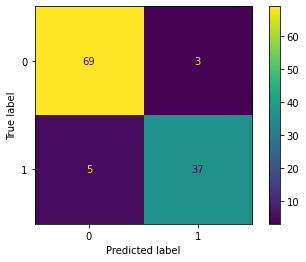

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
plot_confusion_matrix(model_perceptron, x_validation, y_validation)
plt.show()

We also try to check the precision, recall and f1-score

                    precision    recall  f1-score   support

Malignant(Class 0)       0.93      0.96      0.95        72
  Benign (Class 1)       0.93      0.88      0.90        42

          accuracy                           0.93       114
         macro avg       0.93      0.92      0.92       114
      weighted avg       0.93      0.93      0.93       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


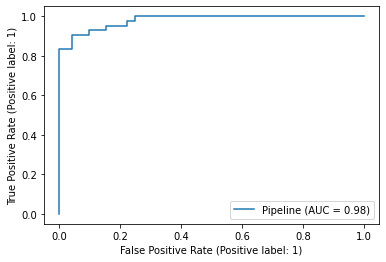

In [ ]:
print(classification_report(y_validation, predictions_perceptron, target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(model_perceptron, x_validation, y_validation)

# *Logistic Regression*


In [ ]:
from sklearn.linear_model import LogisticRegression

After trying with a Perceptron and having already obtained good results, let's try a Logistic Regression that will allow us to obtain better results

In [ ]:
model_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42))
])

In [ ]:
model_lr.fit(x_validation, y_validation)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

Weights that the model has attributed to the features

In [ ]:
pd.Series(index=x.columns, data=model_lr.named_steps["logreg"].coef_.ravel()).sort_values(ascending=False)

concave points_worst    0.994600
smoothness_worst        0.890482
radius_worst            0.852076
concavity_worst         0.803962
perimeter_worst         0.800356
area_worst              0.747442
texture_worst           0.583459
area_mean               0.483587
concavity_mean          0.477917
radius_mean             0.475307
area_se                 0.463340
radius_se               0.461654
perimeter_mean          0.458367
compactness_worst       0.372657
perimeter_se            0.351248
concave points_mean     0.336406
texture_mean            0.243871
symmetry_worst          0.041243
compactness_mean       -0.437643
dtype: float64

Evaluating the accuracy of the model it can be seen that with a LogisticRegression a better accuracy is obtained than before

In [ ]:
model_lr.score(x_validation, y_validation)

0.9912280701754386

Predictions on validation set

In [ ]:
predictions_lr = model_lr.predict(x_validation)

Confusion matrix now is much better

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


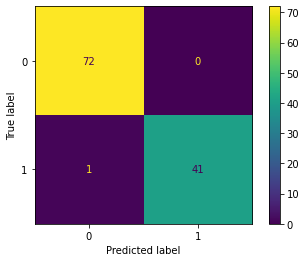

In [ ]:
plot_confusion_matrix(model_lr, x_validation, y_validation)
plt.show()

Also for precision, recall and f1-score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                    precision    recall  f1-score   support

Malignant(Class 0)       0.99      1.00      0.99        72
  Benign (Class 1)       1.00      0.98      0.99        42

          accuracy                           0.99       114
         macro avg       0.99      0.99      0.99       114
      weighted avg       0.99      0.99      0.99       114



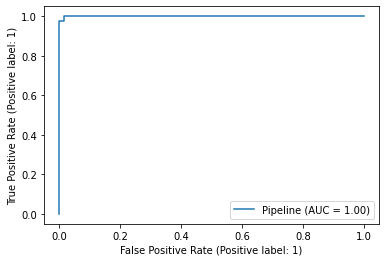

In [ ]:
print(classification_report(y_validation, predictions_lr, target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(model_lr, x_validation, y_validation)

# *Random Forest*


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Let's also try a random forest

In [ ]:
model_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("randomforest", RandomForestClassifier(random_state=42))
])

In [ ]:
model_rf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest', RandomForestClassifier(random_state=42))])

RandomForest performs better than Perceptron but less than LogisticRegression

In [ ]:
model_rf.score(x_validation, y_validation)

0.9649122807017544

Predictions on validation set

In [ ]:
predictions_rf = model_rf.predict(x_validation)

Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


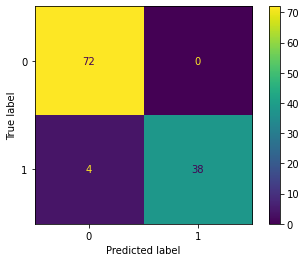

In [ ]:
plot_confusion_matrix(model_rf, x_validation, y_validation)
plt.show()

Also for precision, recall and f1-score

                    precision    recall  f1-score   support

Malignant(Class 0)       0.95      1.00      0.97        72
  Benign (Class 1)       1.00      0.90      0.95        42

          accuracy                           0.96       114
         macro avg       0.97      0.95      0.96       114
      weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


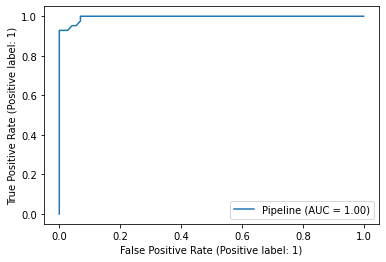

In [ ]:
print(classification_report(y_validation, predictions_rf, target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(model_rf, x_validation, y_validation)

# *SVM*

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))
])

In [ ]:
model_svm.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])

Better than RandomForest

In [ ]:
model_svm.score(x_validation, y_validation)

0.9736842105263158

Predictions on validation set

In [ ]:
predictions_svm = model_svm.predict(x_validation)

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


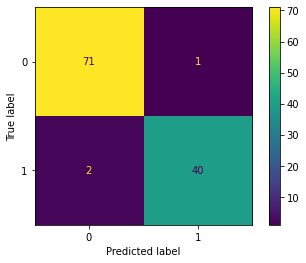

In [ ]:
plot_confusion_matrix(model_svm, x_validation, y_validation)
plt.show()

Also for precision, recall and f1-score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


                    precision    recall  f1-score   support

Malignant(Class 0)       0.97      0.99      0.98        72
  Benign (Class 1)       0.98      0.95      0.96        42

          accuracy                           0.97       114
         macro avg       0.97      0.97      0.97       114
      weighted avg       0.97      0.97      0.97       114



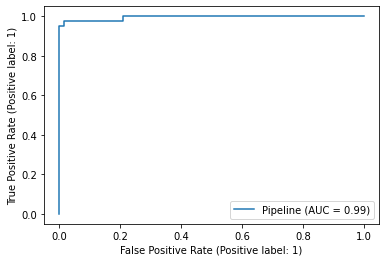

In [ ]:
print(classification_report(y_validation, predictions_svm, target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(model_svm, x_validation, y_validation)

# *Grid Search*

Now that we have seen several models we can use grid search to find the best hyperparameters given an initial model.

The model used is LogisticRegression

In [ ]:
model_lr_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("logreg", LogisticRegression(random_state=42))
])

Define the grid for grid search

In [ ]:
from scipy.stats import loguniform

grid = {
  "scaler": [None, StandardScaler()],
  "logreg__solver": ['newton-cg', 'lbfgs', 'liblinear'],
  "logreg__penalty": [None, "elasticnet", "l2", "l1"],
  "logreg__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

In [ ]:
gs = GridSearchCV(model_lr_poly, grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logreg__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                       100],
                         'logreg__penalty': [None, 'elasticnet', 'l2', 'l1'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'scaler': [None, StandardScaler()]})

We display the best hyperparameters found by the grid search

In [ ]:
gs.score(x_validation, y_validation)

0.9824561403508771

Best parameters that the model found

In [ ]:
gs.best_params_

{'logreg__C': 1.0,
 'logreg__l1_ratio': 0.2,
 'logreg__penalty': 'l2',
 'poly__degree': 1,
 'scaler': StandardScaler()}

We show the results in a DataFrame to better visualize them

In [ ]:
results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(10) 
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logreg__C,param_logreg__l1_ratio,param_logreg__penalty,param_poly__degree,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
273,0.012142,0.000278,0.002614,0.000149,1,0.6,l2,1,StandardScaler(),"{'logreg__C': 1.0, 'logreg__l1_ratio': 0.6, 'l...",0.967033,1.000000,0.967033,0.978022,0.967033,0.975824,0.012815,1
249,0.015904,0.002825,0.003147,0.000513,1,0.4,l2,1,StandardScaler(),"{'logreg__C': 1.0, 'logreg__l1_ratio': 0.4, 'l...",0.967033,1.000000,0.967033,0.978022,0.967033,0.975824,0.012815,1
225,0.010905,0.000229,0.002458,0.000023,1,0.2,l2,1,StandardScaler(),"{'logreg__C': 1.0, 'logreg__l1_ratio': 0.2, 'l...",0.967033,1.000000,0.967033,0.978022,0.967033,0.975824,0.012815,1
177,0.012388,0.002449,0.002873,0.000373,0.1,0.4,l2,1,StandardScaler(),"{'logreg__C': 0.1, 'logreg__l1_ratio': 0.4, 'l...",0.956044,1.000000,0.956044,0.978022,0.978022,0.973626,0.016447,4
153,0.011168,0.001808,0.002939,0.000581,0.1,0.2,l2,1,StandardScaler(),"{'logreg__C': 0.1, 'logreg__l1_ratio': 0.2, 'l...",0.956044,1.000000,0.956044,0.978022,0.978022,0.973626,0.016447,4
201,0.010036,0.000589,0.002582,0.000190,0.1,0.6,l2,1,StandardScaler(),"{'logreg__C': 0.1, 'logreg__l1_ratio': 0.6, 'l...",0.956044,1.000000,0.956044,0.978022,0.978022,0.973626,0.016447,4
297,0.019754,0.002649,0.002951,0.000609,10,0.2,l2,1,StandardScaler(),"{'logreg__C': 10.0, 'logreg__l1_ratio': 0.2, '...",0.967033,0.989011,0.967033,0.978022,0.945055,0.969231,0.014579,7
155,0.024360,0.002516,0.004194,0.000256,0.1,0.2,l2,2,StandardScaler(),"{'logreg__C': 0.1, 'logreg__l1_ratio': 0.2, 'l...",0.967033,1.000000,0.956044,0.967033,0.956044,0.969231,0.016150,7
321,0.018276,0.000920,0.002704,0.000205,10,0.4,l2,1,StandardScaler(),"{'logreg__C': 10.0, 'logreg__l1_ratio': 0.4, '...",0.967033,0.989011,0.967033,0.978022,0.945055,0.969231,0.014579,7
345,0.016002,0.000623,0.002539,0.000163,10,0.6,l2,1,StandardScaler(),"{'logreg__C': 10.0, 'logreg__l1_ratio': 0.6, '...",0.967033,0.989011,0.967033,0.978022,0.945055,0.969231,0.014579,7


Measuring the usual metrics on the best model found by the Grid Search

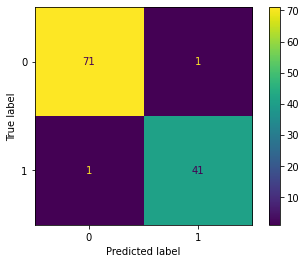

In [ ]:
plot_confusion_matrix(gs, x_validation, y_validation)
plt.show()

In [ ]:
predictions = gs.predict(x_validation)

                    precision    recall  f1-score   support

Malignant(Class 0)       0.99      0.99      0.99        72
  Benign (Class 1)       0.98      0.98      0.98        42

          accuracy                           0.98       114
         macro avg       0.98      0.98      0.98       114
      weighted avg       0.98      0.98      0.98       114



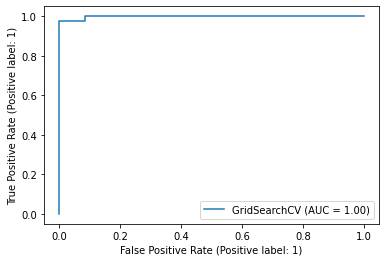

In [ ]:
print(classification_report(y_validation, predictions, target_names = ['Malignant(Class 0)','Benign (Class 1)']))
metrics.plot_roc_curve(gs, x_validation, y_validation)

# *Confidence interval*

Now we can use the confidence interval that can be used to evaluate the model

In [ ]:
def conf_interval(a, N, Z=1.96): # 1 - 𝛼 = 0.95 (𝛼=0.05), Z = 1.96
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d

In [ ]:
from scipy.stats import norm

def model_conf_interval(model, X, y, level=0.95):
    a = model if type(model) == float else model.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    return conf_interval(a, N, Z)

Confidence interval with grid search model

In [ ]:
model_conf_interval(gs, x_validation, y_validation)

(0.9382819735400812, 0.9951755812189312)

Confidence interval with logistic regression model

In [ ]:
model_conf_interval(model_lr, x_validation, y_validation)

(0.9519796532398638, 0.9984498570602217)

So the best model so far is with logistic regression model

# *Neural Networks*

As last we can try with neural networks with Keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

The structure of the network

In [ ]:
model = Sequential([
    Dense(256, activation="relu", input_dim=19),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax") 
])

In [ ]:
from tensorflow.keras.utils import to_categorical
yt_train = to_categorical(y_train)
yt_val = to_categorical(y_validation)

Compile with adam and fit with 20 epochs

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, yt_train, epochs = 200, validation_data = (x_validation, yt_val))

Epoch 1/200
15/15 [==============================] - 1s 18ms/step - loss: 0.7630 - accuracy: 0.8220 - val_loss: 0.3802 - val_accuracy: 0.7807
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2374 - accuracy: 0.9033 - val_loss: 0.1847 - val_accuracy: 0.9211
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1922 - accuracy: 0.9077 - val_loss: 0.2941 - val_accuracy: 0.8860
Epoch 4/200
15/15 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9297 - val_loss: 0.1836 - val_accuracy: 0.9474
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1946 - accuracy: 0.9187 - val_loss: 0.6656 - val_accuracy: 0.8596
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.9055 - val_loss: 0.1819 - val_accuracy: 0.9298
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2312 - accuracy: 0.9055 - val_loss: 0.1808 - val_accuracy: 0.9298
Epoch 8/200


Evaluate the model

In [ ]:
model.evaluate(x_validation, yt_val)

4/4 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9649


[0.15167716145515442, 0.9649122953414917]